# TAI - Final project 
### Option 2 : Implementing two agorithms on one dataset

student name : Mahsa Alirezaee

student number : 0574173

### Introduction

Machine learning algorithms are widely used in different aspects of human life. In the final project of "Techniques of AI" course, I trained two ML models, using two classification algorithms,KNN and SVM, to solve a classification problem. The problem is to decide if the salary of an employee might be less or more than 50k based on some features such as age, education, sex, race,... . In this report I will explain the knowledge and code of each cell individually.

### data and methods

* The dataset I used in this project, is provided from 'Kaggle' website named 'salary'. 

* I splitted the entire data set into train and test set of the ratio of 0.2 for test, and splitted the test set into validation and test sets with the ratio of 50% .

* The algorithms used are KNN(K-nearest neighbors) and SVM(support vector classifier/machine).

* I used 2 different validation techniques- k-fold cross validation and grid searcg cv for evaluating the model performance.


# Importing libraries and preprocessing the dataset

In [1]:
#importing libraries
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
import seaborn as sn
from sklearn.model_selection import cross_val_score,GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC

In [2]:
#Reading the dataset
df = pd.read_csv('salary.csv')
df

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [3]:
#Eliminating some features because of the very high scales between each element that might cause bias and because of lack of information about them.
df.drop(columns=['fnlwgt','education-num','capital-gain','capital-loss','relationship','workclass'], axis =1, inplace =True)


In [4]:
 df

,age,education,marital-status,occupation,race,sex,hours-per-week,native-country,salary
0,39,Bachelors,Never-married,Adm-clerical,White,Male,40,United-States,<=50K
1,50,Bachelors,Married-civ-spouse,Exec-managerial,White,Male,13,United-States,<=50K
2,38,HS-grad,Divorced,Handlers-cleaners,White,Male,40,United-States,<=50K
3,53,11th,Married-civ-spouse,Handlers-cleaners,Black,Male,40,United-States,<=50K
4,28,Bachelors,Married-civ-spouse,Prof-specialty,Black,Female,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...
32556,27,Assoc-acdm,Married-civ-spouse,Tech-support,White,Female,38,United-States,<=50K
32557,40,HS-grad,Married-civ-spouse,Machine-op-inspct,White,Male,40,United-States,>50K
32558,58,HS-grad,Widowed,Adm-clerical,White,Female,40,United-States,<=50K
32559,22,HS-grad,Never-married,Adm-clerical,White,Male,20,United-States,<=50K


In [5]:
#Encoding classes to numeric values in the dataframe
for column in df.columns:
    if (column!= 'age') & (column != 'hours-per-week'):
        df[column] , _ = pd.factorize(df[column])
        

In [6]:
df

,age,education,marital-status,occupation,race,sex,hours-per-week,native-country,salary
0,39,0,0,0,0,0,40,0,0
1,50,0,1,1,0,0,13,0,0
2,38,1,2,2,0,0,40,0,0
3,53,2,1,2,1,0,40,0,0
4,28,0,1,3,1,1,40,1,0
...,...,...,...,...,...,...,...,...,...
32556,27,6,1,10,0,1,38,0,0
32557,40,1,1,9,0,0,40,0,1
32558,58,1,6,0,0,1,40,0,0
32559,22,1,0,0,0,0,20,0,0


In [7]:
#Creating marix of features and array of target values
X = df.iloc[:,:-1].values
y = df.iloc[:,-1].values

In [8]:
#Encoding the target function and convert it to an array
le = LabelEncoder()
y = le.fit_transform(y)


In [9]:
#creating 2 datasets based on the target classes
df0 = df[df.salary==0]
df1 = df[df.salary==1]

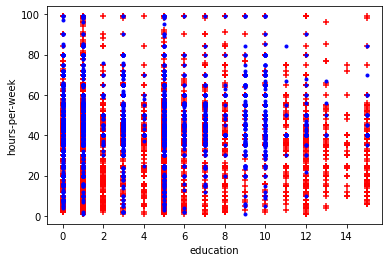

In [10]:
#visualing distribution of datapoints based on one pair of dimensions
plt.scatter(df0['education'],df0['hours-per-week'],color='red',marker='+')
plt.scatter(df1['education'],df1['hours-per-week'],color='blue',marker='.')
plt.xlabel('education')
plt.ylabel('hours-per-week')
plt.show()

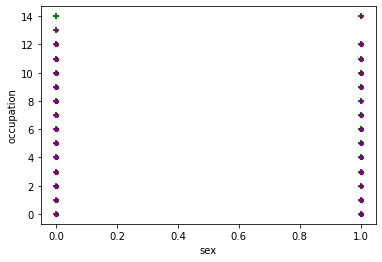

In [11]:
#visualing distribution of datapoints based on another pair of dimensions
plt.scatter(df0['sex'],df0['occupation'],color='green',marker='+')
plt.scatter(df1['sex'],df1['occupation'],color='purple',marker='.')
plt.xlabel('sex')
plt.ylabel('occupation')
plt.show()

In [12]:
#Spliting the dataset to train,validation and test sets
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2,random_state=42)
X_test,X_valid,y_test,y_valid = train_test_split(X_test,y_test,test_size=0.5,random_state=42)

In [13]:
X_train.shape

(26048, 8)

In [14]:
X_valid.shape

(3257, 8)

In [15]:
X_test.shape

(3256, 8)

# Implementing KNN Algorithm

In [16]:
#creating the KNN model
knn = KNeighborsClassifier(n_neighbors=5,metric = 'minkowski',p=2)
knn.fit(X_train,y_train)

KNeighborsClassifier()

In [17]:
#model accuracy
knn.score(X_valid,y_valid)

0.7881486030089039

# Performance evaluation metrics

### Confusion Matrix and Classification Report

Confusion matrix and classification report are tools for a better visualisation of the result and comparison between the vector that the classification model predicted and the certain target vector that we were given.


### Confusion matrix

Classification accuracy alone can be misleading if we have an unequal number of observations in each class or if we have more than two classes in the dataset. Calculating a confusion matrix can give a better idea of what the classification model is getting right and what types of errors it is making.

Interpretation :

True Negative: Model has given prediction No, and the real or actual value was also No.

True Positive: The model has predicted yes, and the actual value was also true.

False Negative: The model has predicted no, but the actual value was Yes, it is also called as Type-II error.

False Positive: The model has predicted Yes, but the actual value was No. It is also called a Type-I error.

In [18]:
#defining the confusion matrix
y_pred = knn.predict(X_valid)
matrix = confusion_matrix(y_valid,y_pred)
matrix

array([[2140,  333],
       [ 357,  427]])

Text(42.0, 0.5, 'Truth')

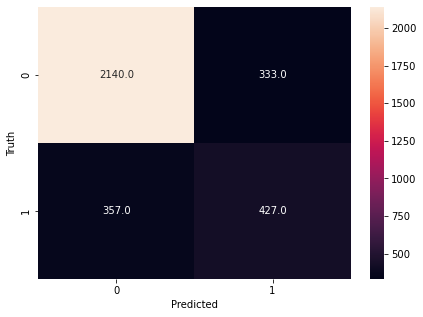

In [19]:
#plotting the confusion matrix
%matplotlib inline
plt.figure(figsize=(7,5))
sn.heatmap(matrix,annot=True,fmt=".1f")
plt.xlabel('Predicted')
plt.ylabel('Truth')

### Classification Report

In a classification report,these metrics are shown :

Precision : Precision is defined as the ratio of true positives to the sum of true and false positives.

Recall : Recall is defined as the ratio of true positives to the sum of true positives and false negatives.

F1 Score : The F1 is the weighted harmonic mean of precision and recall. The closer the value of the F1 score is to 1.0, the better the expected performance of the model is.

Support : Support is the number of actual occurrences of the class in the dataset. It doesn’t vary between models, it just diagnoses the performance evaluation process.

In [20]:
#Printing the classification report
print(classification_report(y_valid,y_pred))

              precision    recall  f1-score   support

           0       0.86      0.87      0.86      2473
           1       0.56      0.54      0.55       784

    accuracy                           0.79      3257
   macro avg       0.71      0.70      0.71      3257
weighted avg       0.79      0.79      0.79      3257



In [21]:
#using k-fold cross validation to decide on K parameter of the model
scores = cross_val_score(knn,X_train,y_train,cv = 10,scoring = 'accuracy')
print(scores.mean())

0.7752995833959861


## KNN model validation

### Deciding on number of k in our model using k-fold cross validation

In [22]:
k_scores = []
for k in range(1,41):
    knn = KNeighborsClassifier(n_neighbors=k,metric = 'minkowski',p=2)
    scores = cross_val_score(knn,X_train,y_train,cv = 5,scoring = 'accuracy')
    k_scores.append(scores.mean())

In [23]:
k_scores

[0.7460459510318957,
 0.7756066220836593,
 0.7617092077089372,
 0.7810196363963302,
 0.7739557292136856,
 0.7817490766939988,
 0.7778333454315929,
 0.7834382393679329,
 0.7783708250411125,
 0.7840907789522712,
 0.7806357739760175,
 0.7860872202216083,
 0.7829390148233771,
 0.7864326875564919,
 0.7857416276052559,
 0.7862407121293465,
 0.7847050782106416,
 0.7853193406215213,
 0.786202294935423,
 0.7869701745355098,
 0.7851274831063467,
 0.7850121946770852,
 0.784167561753631,
 0.7850122020465834,
 0.7844363052431401,
 0.7843595003332856,
 0.7840523838668421,
 0.7834765681278786,
 0.7833231056981329,
 0.7827087695922715,
 0.7823250840399147,
 0.782900840822893,
 0.781941044751646,
 0.7834767597348307,
 0.7814035430336318,
 0.7824017857767949,
 0.7820178128140098,
 0.7828240727605292,
 0.7816722423061518,
 0.7817491946059695]

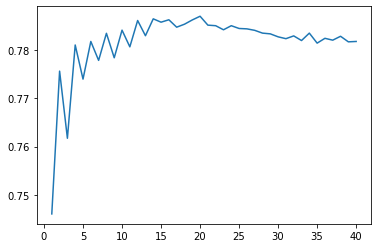

In [24]:
scores_plot = sn.lineplot(x = range(1,41),y = k_scores)

In the graph below, we can see the correlation of accuracy and number of neighbors.

* When the number of k is low, it shows low variance and high bias which is the case of overfitting.

* When the number of k is low, it shows high variance and low bias which is the case of underfitting.

As is clear in the line plot, with k of "21", we will get a higher accuracy, and a better and more simple model.Still, the accuracy is not reasonable, so I will build the model with scaling the columns with different units.

### Applying feature scaling on 2 of the columns

In [26]:
sc = StandardScaler()
X = sc.fit_transform(X)

In [27]:
#Spliting the dataset to train,validation and test sets after applying feature scaling
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2,random_state=42)
X_test,X_valid,y_test,y_valid = train_test_split(X_test,y_test,test_size=0.5,random_state=42)

In [28]:
#Building the final model based on the best k neighbors amount and the good variance in the training set
knn_final = KNeighborsClassifier(n_neighbors=21,metric = 'minkowski',p=2)
knn_final.fit(X_train,y_train)
knn_final.score(X_test,y_test)

0.8191031941031941

In [29]:
#defining the confusion matrix
y_pred = knn_final.predict(X_test)
matrix = confusion_matrix(y_test,y_pred)
matrix

array([[2256,  213],
       [ 376,  411]])

Text(42.0, 0.5, 'Truth')

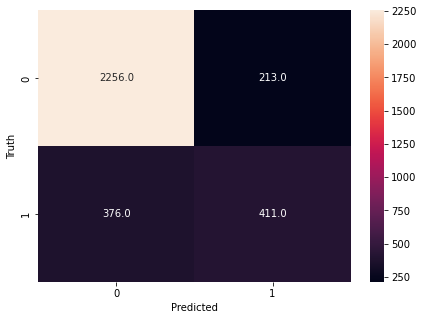

In [30]:
#plotting the confusion matrix
%matplotlib inline
plt.figure(figsize=(7,5))
sn.heatmap(matrix,annot=True,fmt=".1f")
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [31]:
#Printing the classification report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.86      0.91      0.88      2469
           1       0.66      0.52      0.58       787

    accuracy                           0.82      3256
   macro avg       0.76      0.72      0.73      3256
weighted avg       0.81      0.82      0.81      3256



As we can see, by tuning the most important hyperparameter (k) of our knn model and applying feature scaling on 2 of columns with high distance in the parameters, we could increase the accuracy to almost 82%. 


# Implementing SVM 

In [32]:
#Building the SVM model on the feature scaled train data set
svm = SVC(random_state = 42)
svm.fit(X_train,y_train)

SVC(random_state=42)

In [33]:
#testing the model on the validation set
svm.score(X_valid,y_valid)

0.8099478047282775

In [34]:
#defining the confusion matrix
y_pred = svm.predict(X_valid)
matrix = confusion_matrix(y_valid,y_pred)
matrix

array([[2341,  132],
       [ 487,  297]])

Text(42.0, 0.5, 'Truth')

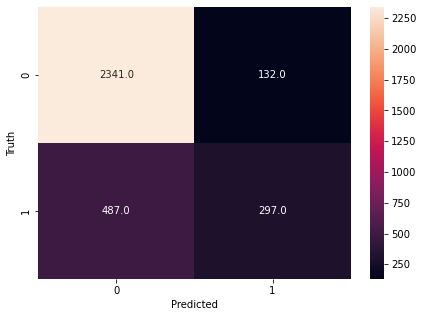

In [35]:
#plotting the confusion matrix
%matplotlib inline
plt.figure(figsize=(7,5))
sn.heatmap(matrix,annot=True,fmt=".1f")
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [36]:
#Printing the classification report
print(classification_report(y_valid,y_pred))

              precision    recall  f1-score   support

           0       0.83      0.95      0.88      2473
           1       0.69      0.38      0.49       784

    accuracy                           0.81      3257
   macro avg       0.76      0.66      0.69      3257
weighted avg       0.80      0.81      0.79      3257



### Tuning the hyperparameters using grid search cv

In this validation technique, the goal is to find the best combination of hyperparameters.

Unlike K-fold cross validation, in this method we can estimate the best set of parameters for our model at once.
This can be done by using 'GridSearchCV' class of 'model_selection' module of scikit learn library.

In [46]:
#Create the param grid
param_grid = {'C': [1, 10, 100], 'gamma': ['auto'],'kernel': ['rbf', 'linear']}
print(param_grid)

{'C': [1, 10, 100], 'gamma': ['auto'], 'kernel': ['rbf', 'linear']}


In [48]:
#grid = GridSearchCV(SVC(),param_grid,cv=3)
#grid.fit(X_train,y_train)

In [49]:
#print(grid.best_params_)

#### * Unfortunately even by trying to increase the number of cv or the hyperparameter values while implementing the validation, My system froze at some points, I commented the code lines to declare the intuition.

### Tuning the 'C' hyperparameter using K-fold cross validation

After the defeat in completely performing the grid search valodation technique, I performed K-fold cross validation technique to adjust the 'c' parameter of the SVM model I built to increase the accuracy and decrease the error respectively.

#### 'C' represents 'Regularization' meaning how much we want to avoid misclassifying each training example. For large values of C, the optimization will choose a smaller-margin hyperplane if that hyperplane does a better job of getting all the training points classified correctly. 

In [50]:
scores = cross_val_score(svm,X_train,y_train,cv = 3,scoring = 'accuracy')
print(scores.mean())

0.8033630451157698


In [51]:
#trying a list of 4 values of c
c_scores = []
for c in [0.1,1,10,100]:
    svm = SVC()
    scores = cross_val_score(svm,X_train,y_train,cv = 5,scoring = 'accuracy')
    c_scores.append(scores.mean())

In [52]:
c_scores

[0.8042843535605178,
 0.8042843535605178,
 0.8042843535605178,
 0.8042843535605178]

The c_scores result shows in this model and the dataset we have, [0.1,1,10,100] values of C gives the same  average accuracy score in each time of performing cross validation. 

In other words, the variation of C does not effect the model accuracy.

### Implementing SVM on non-scaled matrix of features X

In [55]:
X = df.iloc[:,:-1].values
y = df.iloc[:,-1].values

#Encoding the target function and convert it to an array
le = LabelEncoder()
y = le.fit_transform(y)

#splitting the dataset
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2,random_state=42)

#building svm model
svm = SVC(random_state = 42)
svm.fit(X_train,y_train)

#accuracy
svm.score(X_test,y_test)

0.7629356671272839

* This accuracy shows the accuracy deacreases if not applying feature scaling in SVM while some columns are very different with the majority scale-wise.

# Conclusion

* In our case, with the same dataset and data scale , KNN performs more accurately.
* feature scaling had a positive impact on model optimization the both algorithms, So we can conclude that in algorithms that the classification metric is measuring "distance", feature scaling plays a very important role in model optimization.

# References

* https://stats.stackexchange.com/questions/31066/what-is-the-influence-of-c-in-svms-with-linear-kernel#:~:text=The%20C%20parameter%20tells%20the,the%20training%20points%20classified%20correctly.

* https://www.youtube.com/watch?v=V0ZQbN9lRBw

* https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html

* https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html

* https://www.javatpoint.com/confusion-matrix-in-machine-learning

* https://thecleverprogrammer.com/2021/07/07/classification-report-in-machine-learning/#:~:text=A%20classification%20report%20is%20a,of%20your%20trained%20classification%20model.

* https://www.vebuso.com/2020/03/svm-hyperparameter-tuning-using-gridsearchcv/